Лабораторная работа №1 по курсу "Машинное обучение"
Васильев Максим М8О-307Б-18

Импортировали датасет:

In [1]:

import pandas as pd
import numpy as np

data = pd.read_csv('Animes_eda.csv')

Узнаем статистику:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16610 entries, 0 to 16609
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16610 non-null  int64  
 1   anime_id         16610 non-null  int64  
 2   anime_name       16610 non-null  object 
 3   studio_id        16610 non-null  int64  
 4   episodes_total   16121 non-null  float64
 5   source_material  12674 non-null  object 
 6   air_date         16319 non-null  object 
 7   overall_rating   16610 non-null  float64
 8   members          16610 non-null  int64  
 9   synopsis         16605 non-null  object 
 10  number of tags   16610 non-null  int64  
 11  Action           16610 non-null  float64
 12  Adventure        16610 non-null  float64
 13  Cars             16610 non-null  float64
 14  Comedy           16610 non-null  float64
 15  Dementia         16610 non-null  float64
 16  Demons           16610 non-null  float64
 17  Drama       

Заполняем пустые ячейки предыдущими валидными значениями:

In [3]:
data = data.fillna(method='ffill')

Проверяем информацию:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16610 entries, 0 to 16609
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16610 non-null  int64  
 1   anime_id         16610 non-null  int64  
 2   anime_name       16610 non-null  object 
 3   studio_id        16610 non-null  int64  
 4   episodes_total   16610 non-null  float64
 5   source_material  16610 non-null  object 
 6   air_date         16610 non-null  object 
 7   overall_rating   16610 non-null  float64
 8   members          16610 non-null  int64  
 9   synopsis         16610 non-null  object 
 10  number of tags   16610 non-null  int64  
 11  Action           16610 non-null  float64
 12  Adventure        16610 non-null  float64
 13  Cars             16610 non-null  float64
 14  Comedy           16610 non-null  float64
 15  Dementia         16610 non-null  float64
 16  Demons           16610 non-null  float64
 17  Drama       

Удаляем ненужные колонки(синопсис - описание):

In [5]:
data.drop(['Unnamed: 0', 'anime_id', 'synopsis'], axis=1, inplace=True)

In [6]:
data.describe()

,studio_id,episodes_total,overall_rating,members,number of tags,Action,Adventure,Cars,Comedy,Dementia,...,Shounen_Ai,Slice_of_Life,Space,Sports,Super_Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
count,16610.000000,16610.000000,16610.000000,1.661000e+04,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.00000,...,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000,16610.000000
mean,4280.006683,11.604094,4.561711,2.852560e+04,2.882781,0.220951,0.170500,0.007465,0.348585,0.02655,...,0.005539,0.108790,0.029079,0.041601,0.036966,0.083384,0.007345,0.008188,0.002649,0.002348
std,4779.653113,48.931413,3.121130,9.778670e+04,1.643872,0.414900,0.376083,0.086082,0.476537,0.16077,...,0.074219,0.311385,0.168033,0.199683,0.188683,0.276469,0.085390,0.090118,0.051402,0.048401
min,1.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,1.000000,0.000000,2.990000e+02,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,843.500000,2.000000,6.110000,1.874500e+03,3.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9999.000000,12.000000,6.910000,1.191575e+04,4.000000,0.000000,0.000000,0.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9999.000000,3057.000000,9.230000,1.960776e+06,13.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Переводим все значния ячеек в численные значения, чтобы удобнее было работать

In [7]:
cols = list(data.columns)
data[cols] = data[cols].apply(lambda x: pd.Categorical(x).codes)
data

,anime_name,studio_id,episodes_total,source_material,air_date,overall_rating,members,number of tags,Action,Adventure,...,Slice_of_Life,Space,Sports,Super_Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,studio_name
0,2450,11,25,9,785,505,8826,5,1,1,...,0,1,0,0,0,0,0,0,0,487
1,15753,11,25,9,4430,357,7541,5,1,0,...,0,0,0,0,1,0,0,0,0,487
2,15931,11,67,6,7299,426,7327,1,0,0,...,0,0,0,0,0,0,0,0,0,487
3,2320,11,24,9,8039,268,4269,3,1,0,...,0,0,0,0,0,0,0,0,0,487
4,9439,11,42,9,1224,409,7507,4,1,0,...,0,1,0,0,0,0,0,0,0,487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16605,7274,483,0,9,91,0,668,1,0,0,...,0,0,0,0,0,0,0,0,0,131
16606,13437,578,0,9,6053,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,552
16607,7258,578,1,9,8179,0,14,0,0,0,...,0,0,0,0,0,0,0,0,0,552
16608,10034,579,0,9,8583,0,24,0,0,0,...,0,0,0,0,0,0,0,0,0,155


Строим графики по каждой из колонок:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f70cd6e9e10>,
      dtype=object)

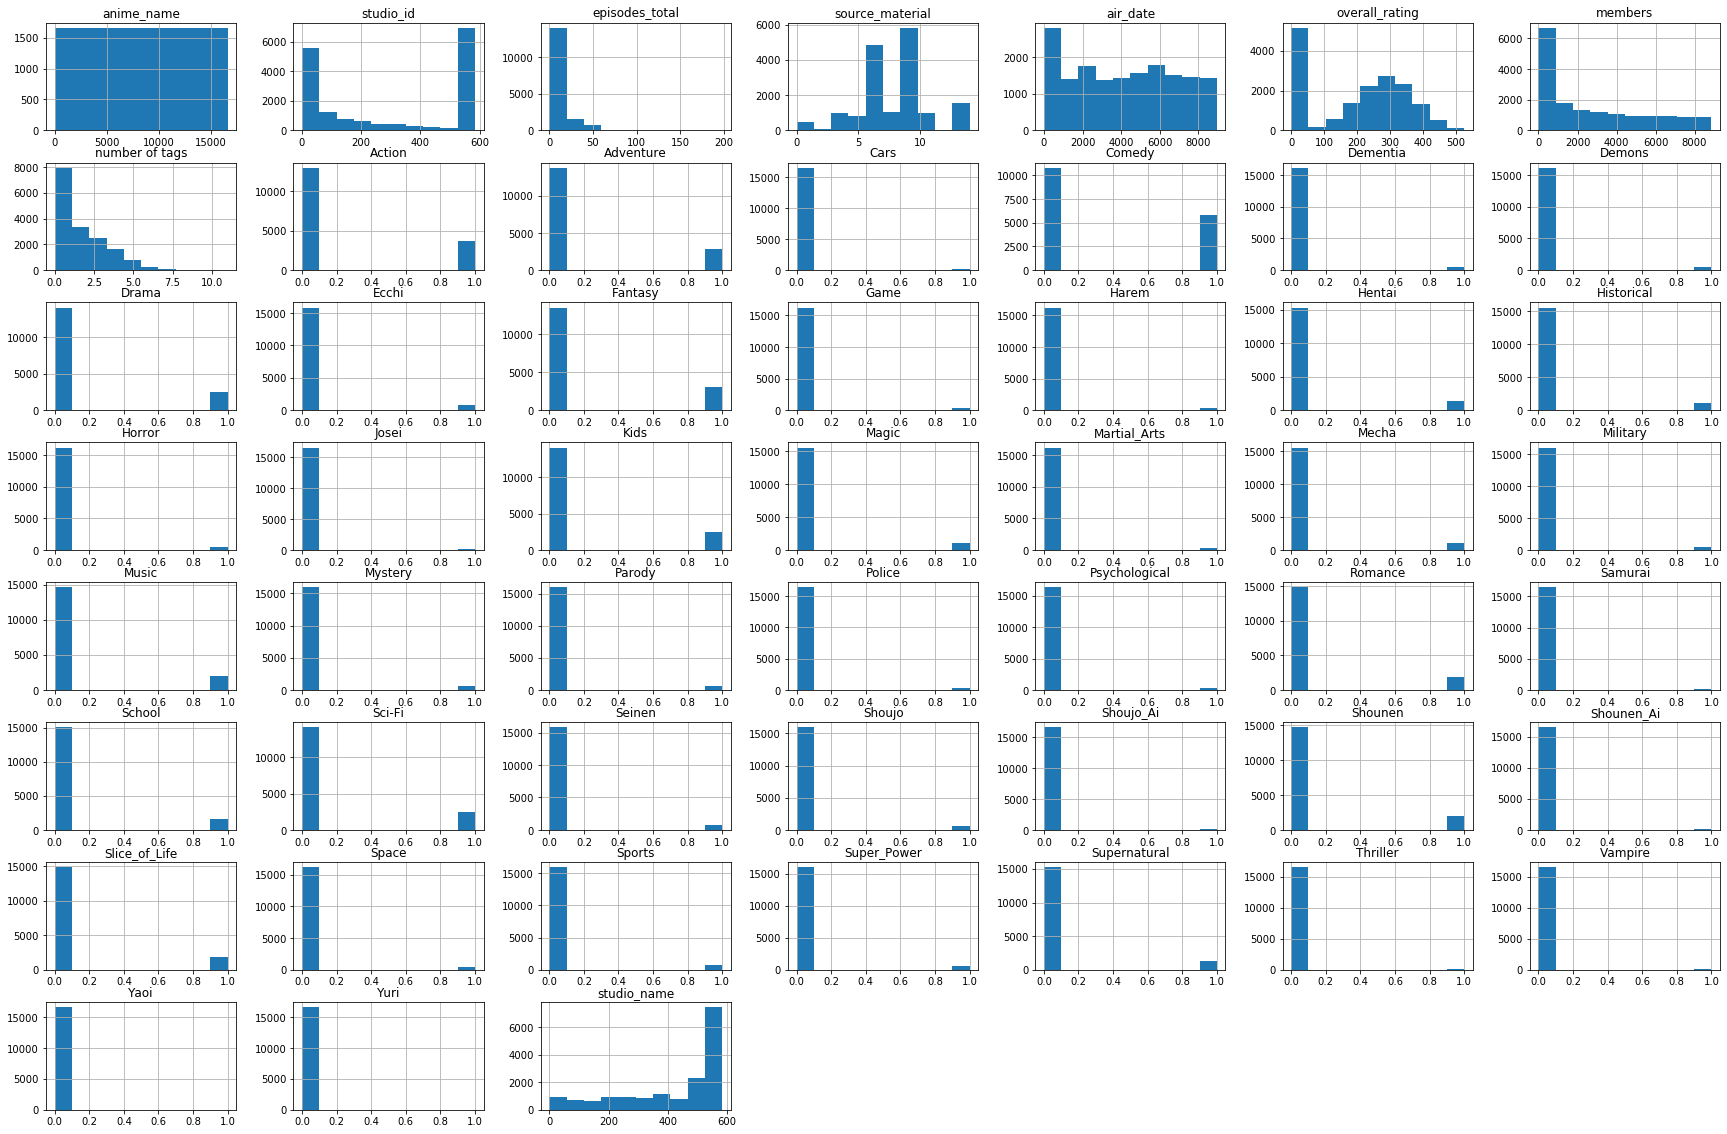

In [8]:
%matplotlib inline
data[cols].hist(figsize=(30,20))

Алгоритм KNN

Для выполнения данного задания я решил выбрать другой датасет, потому что в этом датасете нет булевых параметров. Но я все равно пытался реализовать метод ближайших соседей с этим датаесетом, чтобы найти зависимость рейтинга от жанров, я пробовал менять количесвто соседей, веса, листья, алгоритмы, но все равно среднеквадратичная ошибка была огромной.
Взял датасет с внешней статистикой человека, чтобы узнать какого он пола.

In [9]:
data = pd.read_csv('gender_classification_v7.csv')

Так же переводим все значния ячеек в численные значения, чтобы удобнее было работать

In [10]:
cols = list(data.columns)
data[cols] = data[cols].apply(lambda x: pd.Categorical(x).codes)

Разделяем датасет на тренировочный и тестируемый:

In [11]:
from sklearn.model_selection import train_test_split

X, Y = data.drop(columns=['gender']).to_numpy(), np.array(data['gender'])
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.15, random_state=15)

Используем реализацияю sklearn:

In [12]:
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

def print_accuracy(a,b):
    print(accuracy_score(a,b), " accuracy_score")
    print(precision_score(a,b), " precision_score")
    print(recall_score(a,b), " recall_score")

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

sk_knn = KNeighborsClassifier(15, weights="distance")
sk_knn.fit(Xtrain, Ytrain)
print_accuracy(Ytest, sk_knn.predict(Xtest))


0.9707057256990679  accuracy_score
0.9943820224719101  precision_score
0.946524064171123  recall_score


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:
Вычислить расстояние до каждого из объектов обучающей выборки
Отобрать k объектов обучающей выборки, расстояние до которых минимально
Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди k ближайших соседей

In [14]:
def dist(a, b):
    return np.count_nonzero(a - b)

def myKNN(X, k):
    y = np.zeros(X.shape[0])
    
    for index in range(X.shape[0]):
        n = Xtrain.shape[0]
        x = X[index]

        #список индексов объектов и расстояний до них
        dist_class = np.zeros((n, 2))

        for i in range(n):
            dist_class[i][0] = i
            dist_class[i][1] = dist(Xtrain[i], x)

        #выбираем k ближайших соседей
        kn = sorted(dist_class, key=lambda x: x[1])[:k]

        #определяем, какой класс преобладает
        num_class = [0, 0]
        for i in range(k):
            num_class[Ytrain[int(kn[i][0])]] += 1

        if num_class[0] > num_class[1]:
            y[index] = 0
        else:
            y[index] = 1
    
    return y

In [15]:
print_accuracy(Ytest, myKNN(Xtest, 15))

0.9613848202396804  accuracy_score
0.9575596816976127  precision_score
0.9652406417112299  recall_score


Наивный Байесовский классификатор

Реализация sklearn:

In [16]:
from sklearn.naive_bayes import GaussianNB
sk_nb = GaussianNB()
sk_nb.fit(Xtrain, Ytrain)

print_accuracy(Ytest, sk_nb.predict(Xtest))

0.966711051930759  accuracy_score
0.9703504043126685  precision_score
0.9625668449197861  recall_score


Для наивного Байесовского классификатора необходимо определить вероятности появления каждого класса и условную вероятность появления каждого признака для каждого класса:

In [17]:
nb_count1 = np.count_nonzero(Ytrain)
nb_count0 = Ytrain.shape[0] - nb_count1
nb_prob0 = nb_count0 / Ytrain.shape[0]
nb_prob1 = nb_count1 / Ytrain.shape[0]

In [18]:

#если xi=j, то nb_probsC[i][j] условная вероятность xi=j в классе C
nb_probs0, nb_probs1 = [], []

for i in range(Xtrain.shape[1]):
    nb_probs0.append(np.zeros(Xtrain[::,i].max() + 1))
    nb_probs1.append(np.zeros(Xtrain[::,i].max() + 1))
    
    for j in range(Xtrain.shape[0]):
        if Ytrain[j] == 0:
            nb_probs0[i][Xtrain[j][i]] += 1
        else:
            nb_probs1[i][Xtrain[j][i]] += 1
    
    if np.count_nonzero(nb_probs0[i]) != nb_probs0[i].shape[0]:
        nb_probs0[i] = nb_probs0[i] + 1
        
    if np.count_nonzero(nb_probs1[i]) != nb_probs1[i].shape[0]:
        nb_probs1[i] = nb_probs1[i] + 1
    
    nb_probs0[i] = nb_probs0[i] / nb_count0
    nb_probs1[i] = nb_probs1[i] / nb_count1

Вероятности вычисляются как произведения условных вероятностей для каждого элемента строки и вероятности данного класса:

In [19]:
def NB(X):
    y = np.zeros(X.shape[0])
    
    for index in range(X.shape[0]):
        x = X[index]
        p0 = nb_prob0
        p1 = nb_prob1

        for i in range(x.shape[0]):
            p0 *= nb_probs0[i][x[i]]
            p1 *= nb_probs1[i][x[i]]

        if p1 > p0:
            y[index] = 1
        else:
            y[index] = 0
    
    return y

In [20]:
print_accuracy(Ytest, NB(Xtest))

0.9786950732356857  accuracy_score
0.994475138121547  precision_score
0.9625668449197861  recall_score


Выводы:
Я проанализировал два датасета, с первым получилось неудачно, потому что данные не подходят для задачи классификации. Со вторым датасетом получилось все намного лучше, для метода ближайших соседей лучшим количеством соседей оказалось число 15, точность оказалась довольно большой, что не может ни радовать, моя реализиация немного отличается по точности от реализацит  sklearn. Наивный Байесовский классификатор тоже показал отличную точность, но результат не совпал.  